<a href="https://colab.research.google.com/github/SimranShaikh20/Stackoverflow-Analysis/blob/main/OpenSourceEda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA to Open  Source Analysis

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/survey_results_sample_2018 (1).csv')

# Display basic information
print(df.info())
print(df.describe())

# Handle missing values
df = df.fillna('Not Specified')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(42), int64(1), object(86)
memory usage: 99.9+ KB
None
       Respondent  AssessJob1  AssessJob2  AssessJob3  AssessJob4  AssessJob5  \
count   99.000000   64.000000   64.000000   64.000000   64.000000   64.000000   
mean    74.252525    5.750000    6.437500    6.312500    4.359375    3.218750   
std     42.168598    2.817181    2.695528    2.641999    2.674792    2.458989   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     40.000000    4.000000    4.750000    4.000000    2.000000    1.000000   
50%     77.000000    6.000000    7.000000    7.000000    4.000000    2.000000   
75%    111.500000    8.000000    9.000000    8.000000    6.000000    4.000000   
max    143.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

       AssessJob6  AssessJob7  AssessJob8  AssessJob9  ...  \
count    64.00000   6

In [3]:


# Handle missing values
df = df.fillna('Not Specified')

# Value counts for categorical columns
categorical_columns = ['Country', 'Employment', 'DevType', 'LanguageWorkedWith']  # Changed 'EmploymentStatus' to 'Employment'
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True).head())


Value counts for Country:
Country
United States         0.282828
India                 0.161616
United Kingdom        0.070707
Germany               0.050505
Russian Federation    0.040404
Name: proportion, dtype: float64

Value counts for Employment:
Employment
Employed full-time    0.919192
Employed part-time    0.080808
Name: proportion, dtype: float64

Value counts for DevType:
DevType
Full-stack developer                                           0.080808
Back-end developer;Front-end developer;Full-stack developer    0.060606
Back-end developer;Full-stack developer                        0.050505
Mobile developer                                               0.040404
Back-end developer;DevOps specialist                           0.020202
Name: proportion, dtype: float64

Value counts for LanguageWorkedWith:
LanguageWorkedWith
Not Specified                                    0.252525
Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS      0.020202
JavaScript;PHP;HTML;CSS                 

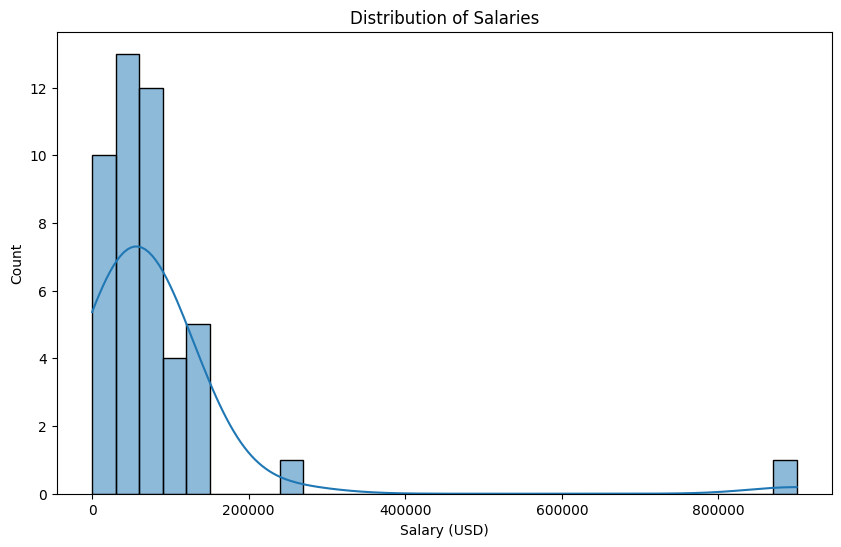

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary analysis
df['ConvertedSalary'] = pd.to_numeric(df['ConvertedSalary'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedSalary'].dropna(), kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.show()

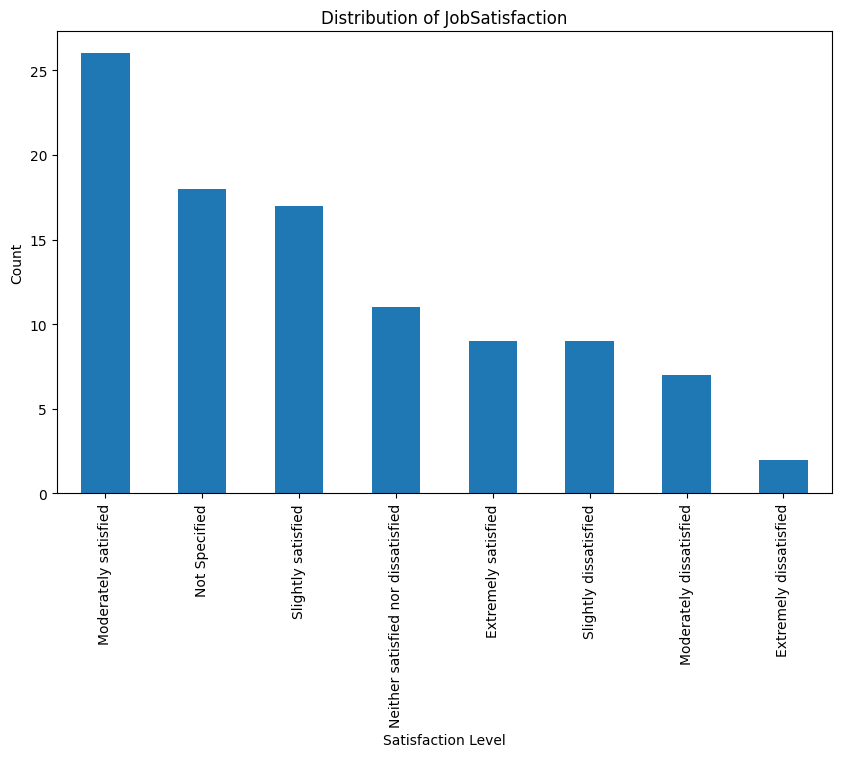

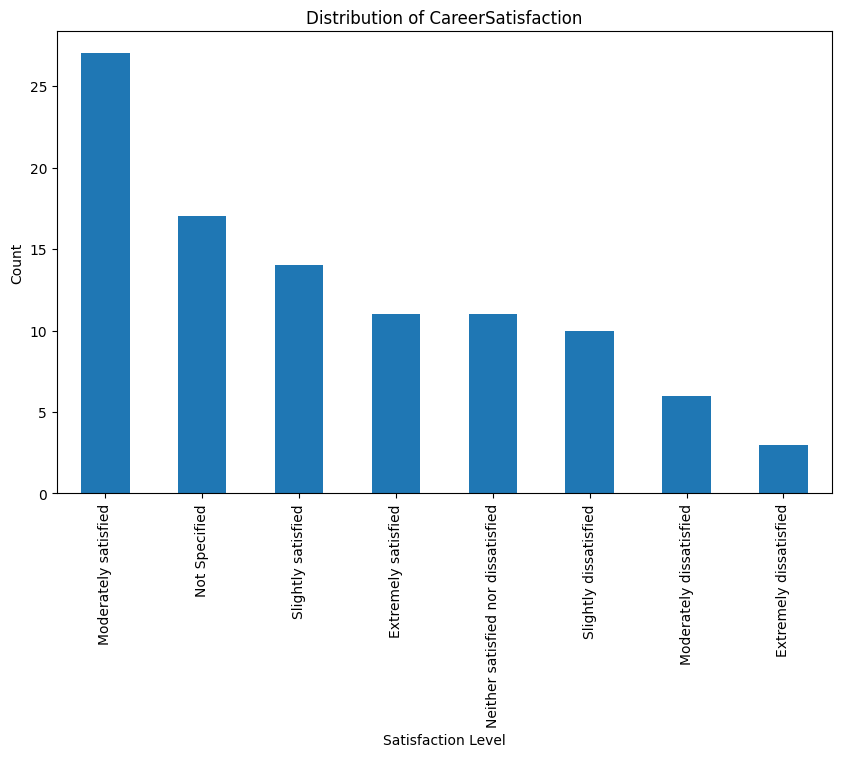

In [5]:
# Job satisfaction analysis
satisfaction_cols = ['JobSatisfaction', 'CareerSatisfaction']
for col in satisfaction_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Satisfaction Level')
    plt.ylabel('Count')
    plt.show()

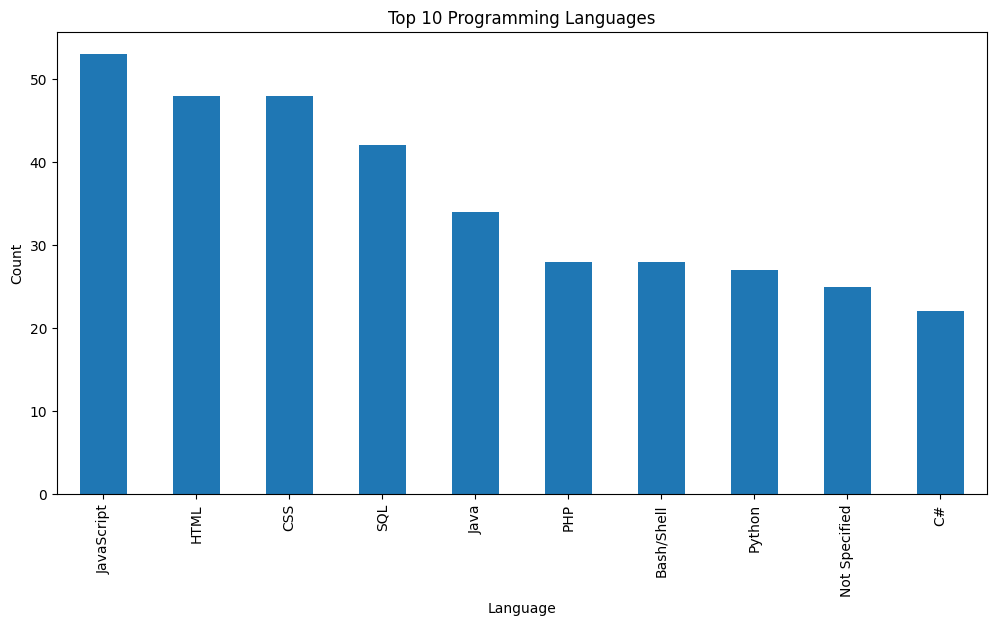

In [6]:
# Programming languages analysis
languages = df['LanguageWorkedWith'].str.split(';', expand=True).stack()
plt.figure(figsize=(12, 6))
languages.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Programming Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

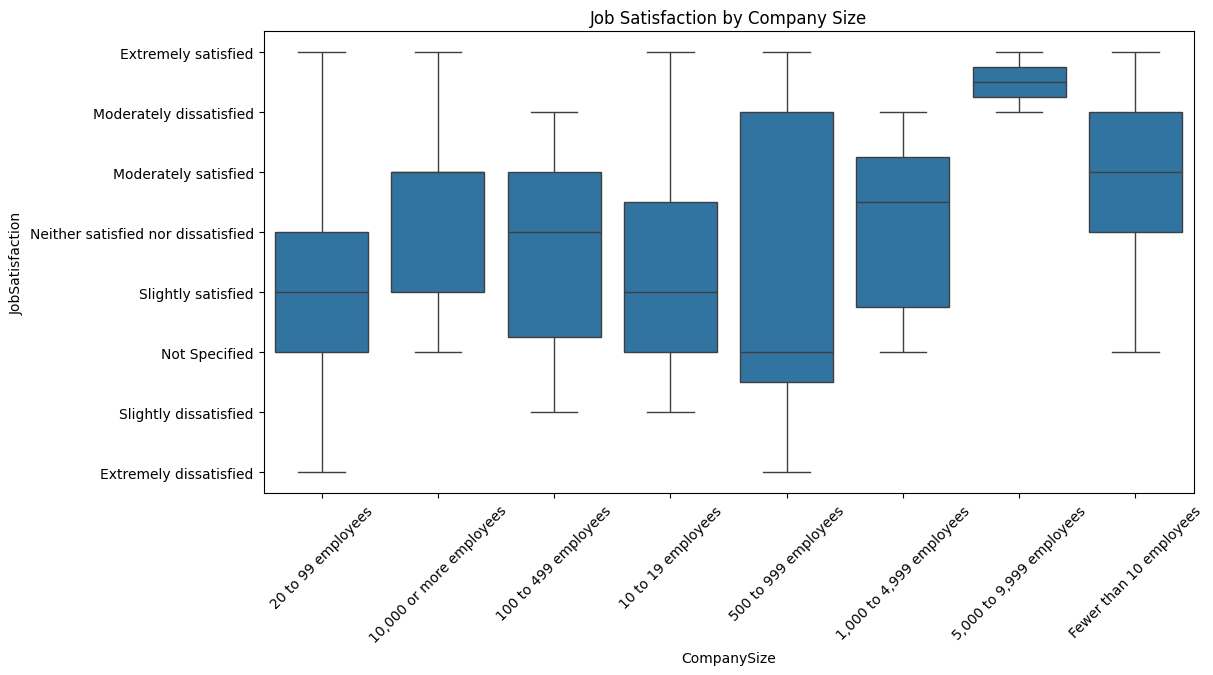

In [11]:
# Job satisfaction by company size
plt.figure(figsize=(12, 6))
sns.boxplot(x='CompanySize', y='JobSatisfaction', data=df)
plt.xticks(rotation=45)
plt.title('Job Satisfaction by Company Size')
plt.show()

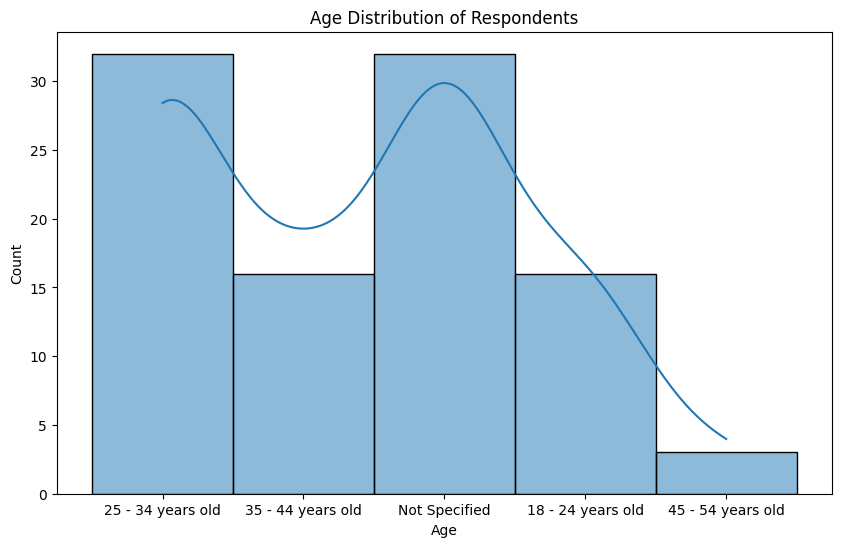

In [13]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.show()

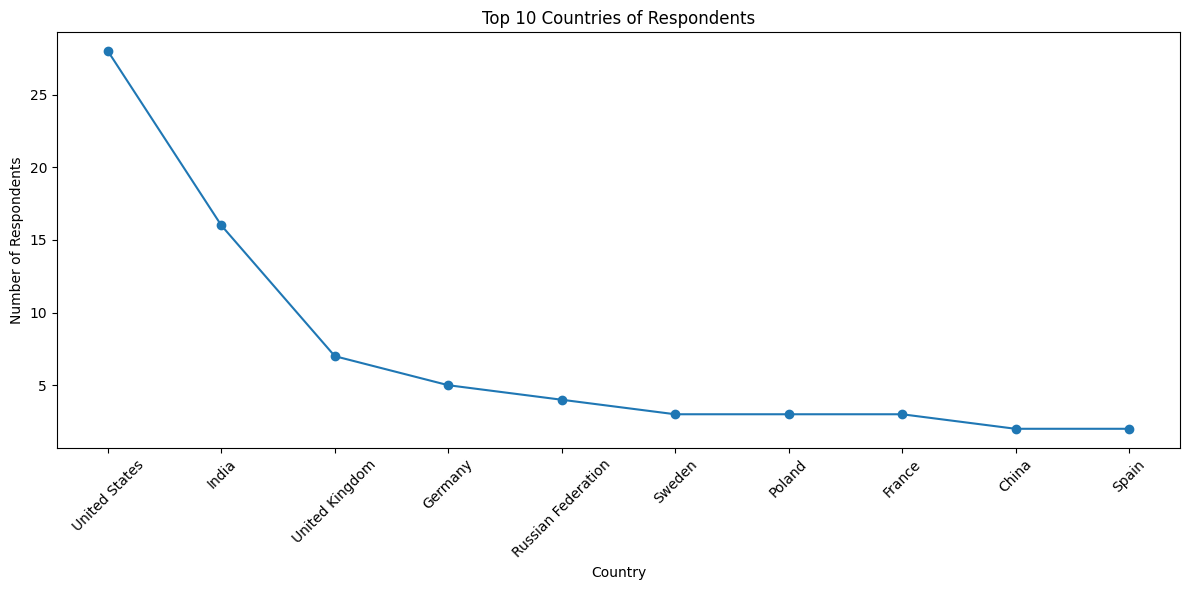

In [14]:
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.plot(country_counts.index, country_counts.values, marker='o')
plt.title('Top 10 Countries of Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

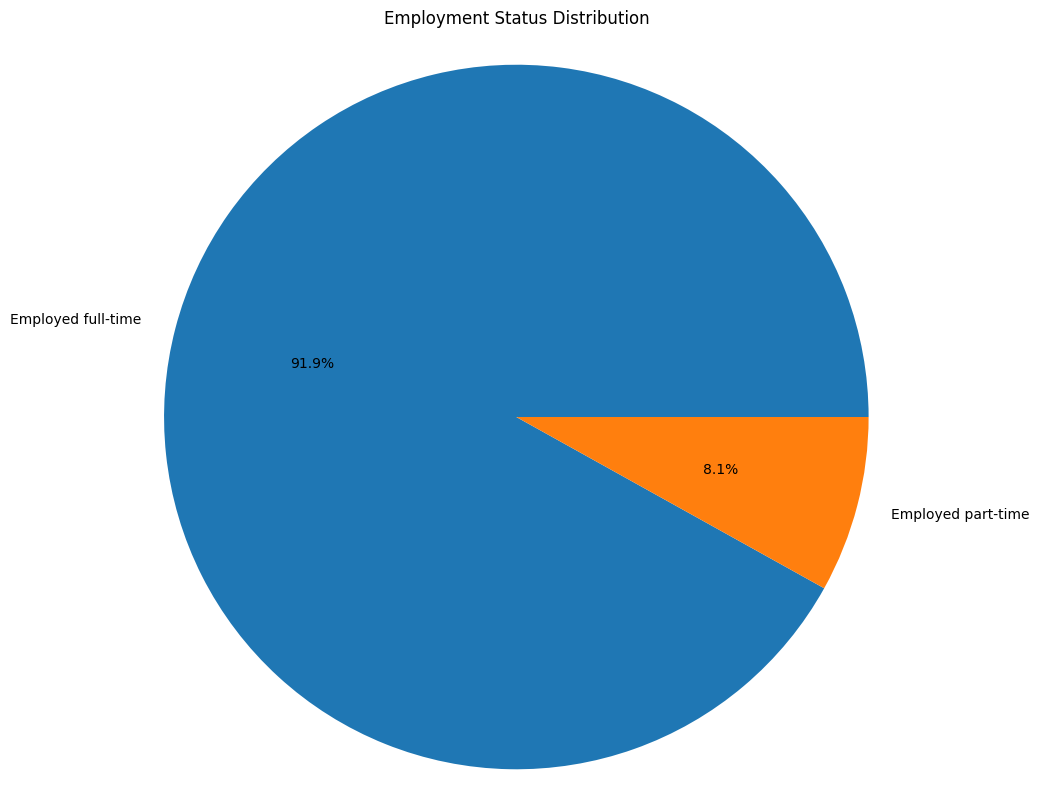

In [15]:
# Assuming 'Employment' column exists
employment_counts = df['Employment'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%')
plt.title('Employment Status Distribution')
plt.axis('equal')
plt.show()

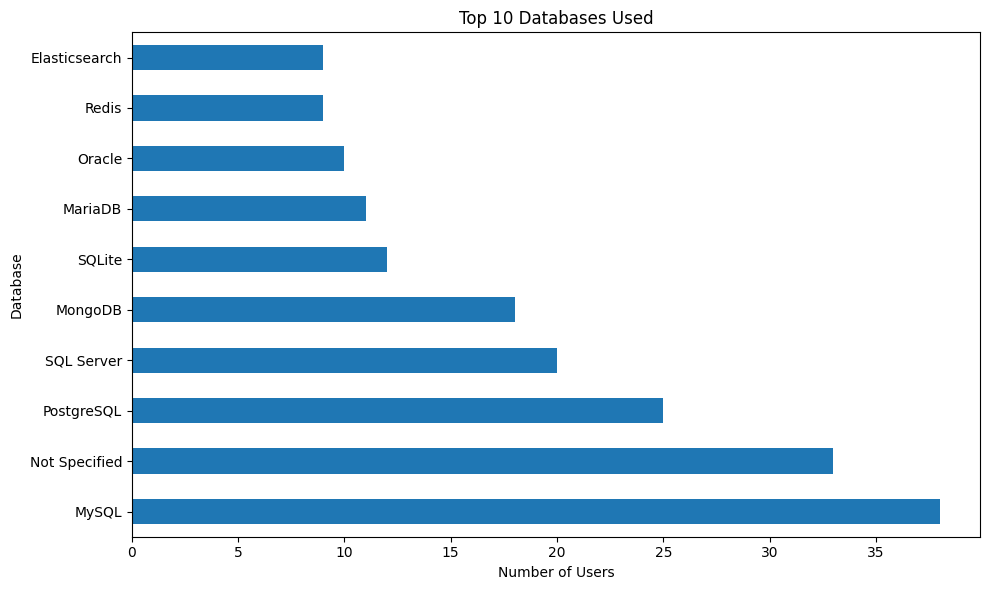

In [18]:
# Assuming 'DatabaseWorkedWith' column exists
databases = df['DatabaseWorkedWith'].str.split(';', expand=True).stack()
db_counts = databases.value_counts().head(10)

plt.figure(figsize=(10, 6))
db_counts.plot(kind='barh')
plt.title('Top 10 Databases Used')
plt.xlabel('Number of Users')
plt.ylabel('Database')
plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

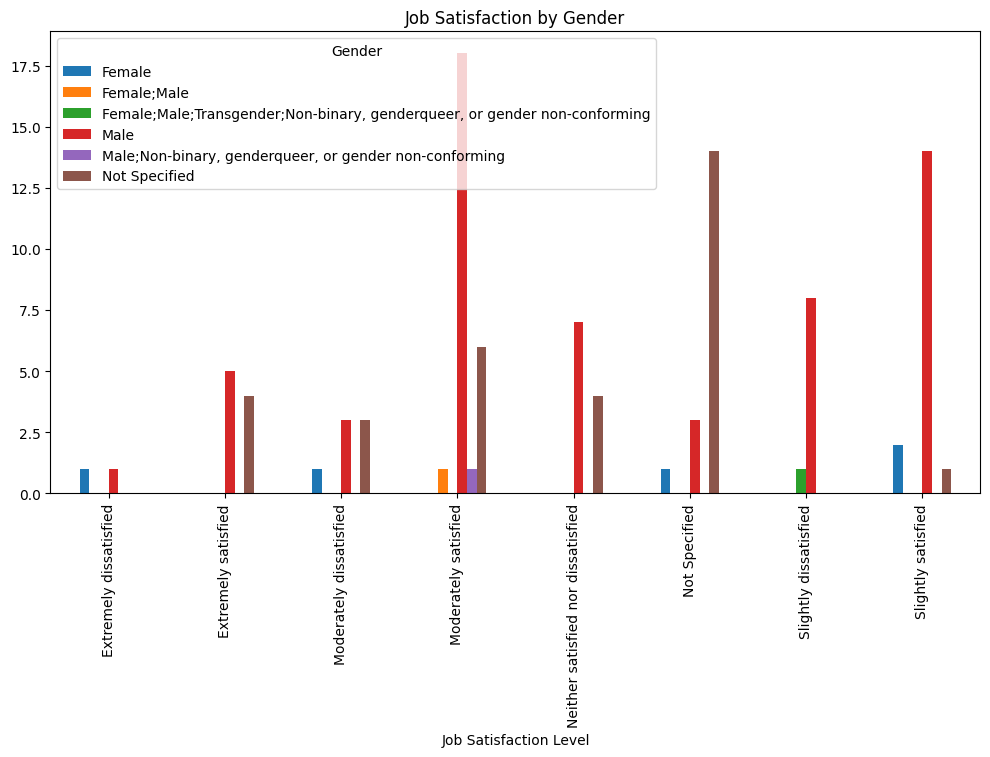

In [20]:
# Assuming 'JobSatisfaction' and 'Gender' columns exist
job_sat_gender = pd.crosstab(df['JobSatisfaction'], df['Gender'])

job_sat_gender.plot(kind='bar', figsize=(12, 6))
plt.title('Job Satisfaction by Gender')
plt.xlabel('Job Satisfaction Level')
plt

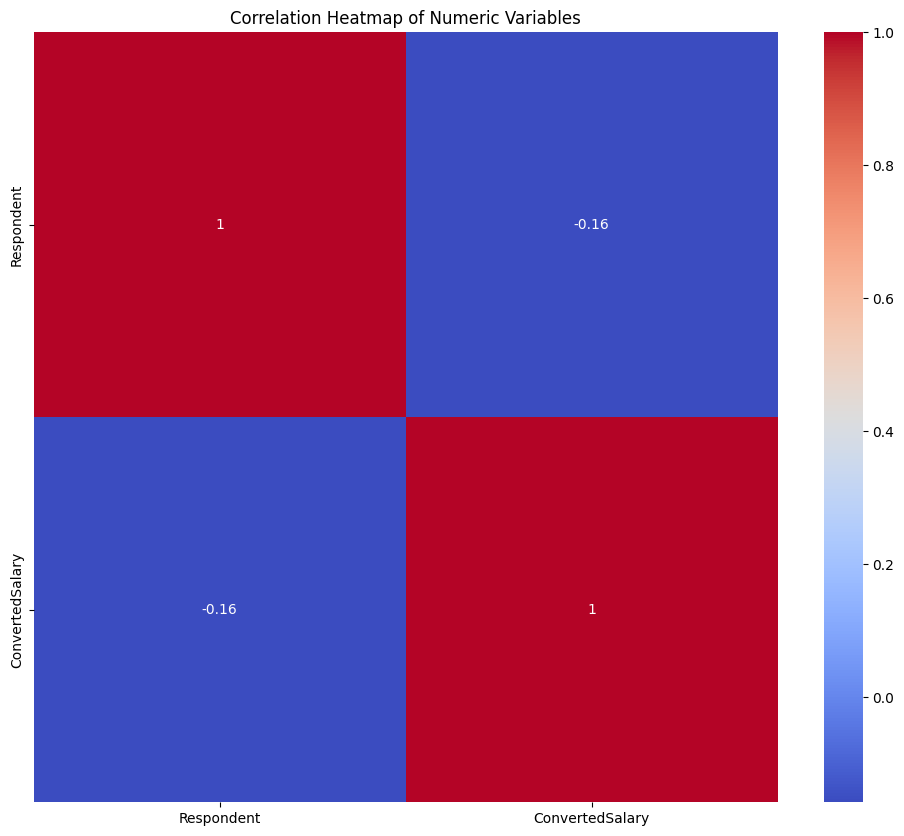

In [22]:
# Heatmap - Correlation of Numeric Columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

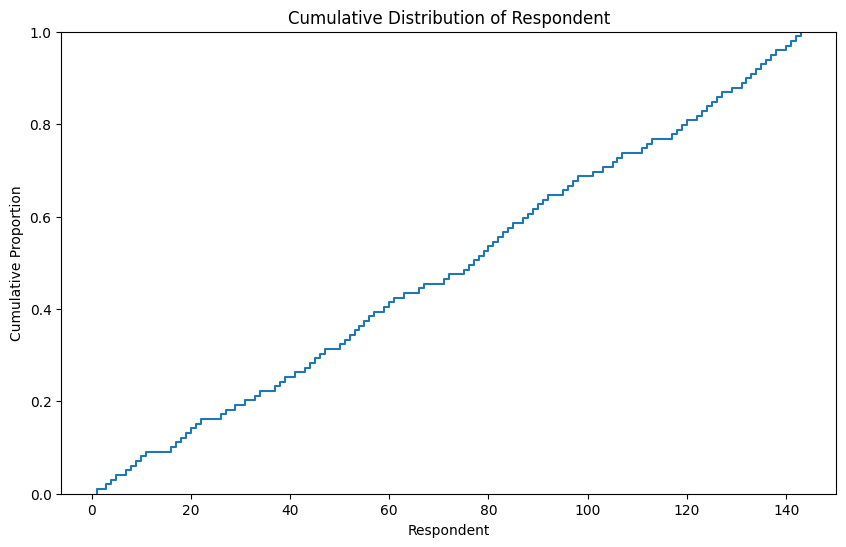

In [24]:
#  Line Plot - Cumulative Distribution of a Numeric Variable
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns[0]  # Choose the first numeric column
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x=numeric_col)
plt.title(f'Cumulative Distribution of {numeric_col}')
plt.xlabel(numeric_col)
plt.ylabel('Cumulative Proportion')
plt.show()